### IMPORTING LIBRARIES

In [1]:
# Importing libraries

import numpy as np    # linear algebra
import pandas as pd   # data processing
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### DATASET ANALYSIS

In [2]:
# Reading the adult.data dataset
adult_data = pd.read_csv('dataset/adult.data', header=None)

In [3]:
# Open the file for reading 
with open(r"dataset/adult.test", "r") as f:
    lines = f.readlines()   # Reading all the lines into a list

# Removing the first line
lines = lines[1:]

# Open the file for writing
with open(r"dataset/adult.test2", "w") as f:
    f.writelines(lines)

In [4]:
# Reading the adult.test dataset
adult_test = pd.read_csv('dataset/adult.test2', header=None)

In [5]:
# Concating the two datasets
conc_data = pd.concat([adult_data, adult_test])
conc_data

0                  1       2           3   4                    5   \
0      39          State-gov   77516   Bachelors  13        Never-married   
1      50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2      38            Private  215646     HS-grad   9             Divorced   
3      53            Private  234721        11th   7   Married-civ-spouse   
4      28            Private  338409   Bachelors  13   Married-civ-spouse   
...    ..                ...     ...         ...  ..                  ...   
16276  39            Private  215419   Bachelors  13             Divorced   
16277  64                  ?  321403     HS-grad   9              Widowed   
16278  38            Private  374983   Bachelors  13   Married-civ-spouse   
16279  44            Private   83891   Bachelors  13             Divorced   
16280  35       Self-emp-inc  182148   Bachelors  13   Married-civ-spouse   

                       6                7                    8        9   \
0            Adm-clerical    Not-in-family                White     Male   
1         Exec-managerial          Husband                White     Male   
2       Handlers-cleaners    Not-in-family                White     Male   
3       Handlers-cleaners          Husband                Black     Male   
4          Prof-specialty             Wife                Black   Female   
...                   ...              ...                  ...      ...   
16276      Prof-specialty    Not-in-family                White   Female   
16277                   ?   Other-relative                Black     Male   
16278      Prof-specialty          Husband                White     Male   
16279        Adm-clerical        Own-child   Asian-Pac-Islander     Male   
16280     Exec-managerial          Husband                White     Male   

         10  11  12              13       14  
0      2174   0  40   United-States    <=50K  
1         0   0  13   United-States    <=50K  
2         0   0  40   United-States    <=50K  
3         0   0  40   United-States    <=50K  
4         0   0  40            Cuba    <=50K  
...     ...  ..  ..             ...      ...  
16276     0   0  36   United-States   <=50K.  
16277     0   0  40   United-States   <=50K.  
16278     0   0  50   United-States   <=50K.  
16279  5455   0  40   United-States   <=50K.  
16280     0   0  60   United-States    >50K.  

[48842 rows x 15 columns]

In [6]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'income']
conc_data.columns = column_names
conc_data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [7]:
# Number of instances and attributes
conc_data.shape

(48842, 15)

In [8]:
conc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
# Sum of the missing cells of each attribute
conc_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [10]:
# Categorical variables
cat_cols = []
for col in conc_data.columns:
    if conc_data[col].dtype == 'O':
        cat_cols.append(col)

In [11]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [12]:
# education-num column should also be categorical so we will add it
cat_cols.append('education-num')

In [13]:
conc_data[cat_cols]

workclass   education       marital-status          occupation  \
0              State-gov   Bachelors        Never-married        Adm-clerical   
1       Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2                Private     HS-grad             Divorced   Handlers-cleaners   
3                Private        11th   Married-civ-spouse   Handlers-cleaners   
4                Private   Bachelors   Married-civ-spouse      Prof-specialty   
...                  ...         ...                  ...                 ...   
16276            Private   Bachelors             Divorced      Prof-specialty   
16277                  ?     HS-grad              Widowed                   ?   
16278            Private   Bachelors   Married-civ-spouse      Prof-specialty   
16279            Private   Bachelors             Divorced        Adm-clerical   
16280       Self-emp-inc   Bachelors   Married-civ-spouse     Exec-managerial   

          relationship                 race      sex  native-country   income  \
0        Not-in-family                White     Male   United-States    <=50K   
1              Husband                White     Male   United-States    <=50K   
2        Not-in-family                White     Male   United-States    <=50K   
3              Husband                Black     Male   United-States    <=50K   
4                 Wife                Black   Female            Cuba    <=50K   
...                ...                  ...      ...             ...      ...   
16276    Not-in-family                White   Female   United-States   <=50K.   
16277   Other-relative                Black     Male   United-States   <=50K.   
16278          Husband                White     Male   United-States   <=50K.   
16279        Own-child   Asian-Pac-Islander     Male   United-States   <=50K.   
16280          Husband                White     Male   United-States    >50K.   

       education-num  
0                 13  
1                 13  
2                  9  
3                  7  
4                 13  
...              ...  
16276             13  
16277              9  
16278             13  
16279             13  
16280             13  

[48842 rows x 10 columns]

In [14]:
# We have an imbalanced dataset
for col in cat_cols:
    print(conc_data[col].value_counts())
    print()

workclass
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64

education
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: count, dtype: int64

marital-status
 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: count, dtype: int64

occupation
 Prof-specialty       6172
 Craft-repa

In [15]:
# Numerical columns
num_cols = set(conc_data.columns).difference(cat_cols)

In [16]:
num_cols = list(num_cols)
num_cols

['age', 'capital-loss', 'hours-per-week', 'fnlwgt', 'capital-gain']

<Figure size 1000x3000 with 0 Axes>

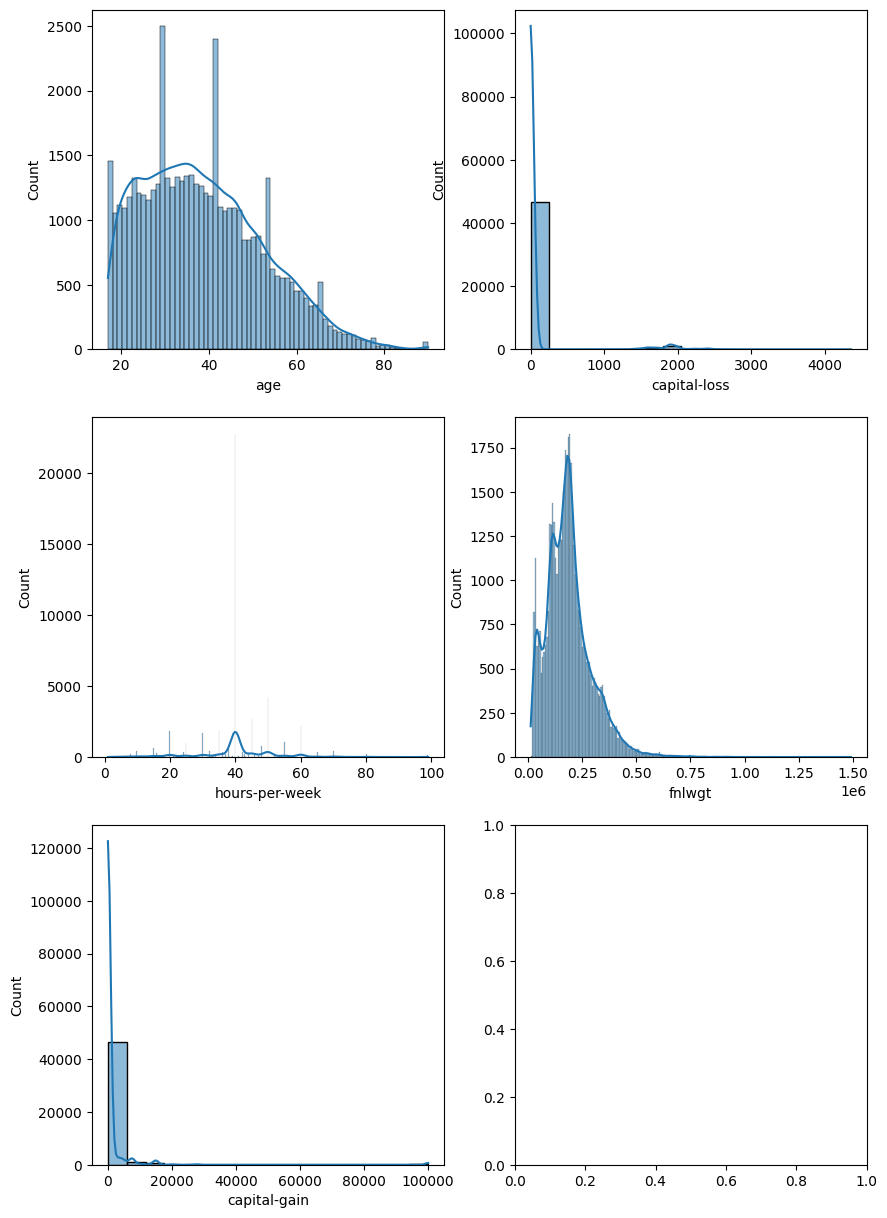

In [17]:
plt.figure(figsize = (10, 30))

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))

axes = axes.flatten()

for i,col in enumerate(num_cols):
    sns.histplot(conc_data[col], kde = True, ax = axes[i])
    
plt.show()

### DATA CLEANING

In [18]:
# Counting the number of unique values
conc_data.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [19]:
# Printing unique values for each column
for column in conc_data.columns:
    unique_values = conc_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt unique values:
[ 77516  83311 215646 ... 173449  89686 350977]


education unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation unique values:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cl

In [20]:
# Checking the count of '?' in each columns.
conc_data.isin([' ?']).sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [21]:
# Only workclass, occupation and native.country has unknown values
# Imputing with mode values
for col in ['workclass', 'occupation', 'native-country']:
    conc_data[col].replace(' ?', pd.NA, inplace=True)

In [22]:
# Dropping the rows with NaN in the above columns
conc_data = conc_data.dropna(subset=['workclass', 'occupation', 'native-country'])

In [23]:
# Printing the unique values after droppping
for col in ['workclass', 'occupation', 'native-country']:
    print(f"{col} unique values after removing '?':")
    print(conc_data[col].unique())

workclass unique values after removing '?':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
occupation unique values after removing '?':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
native-country unique values after removing '?':
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands'

In [24]:
# Replacing the income values which has the . without it
conc_data['income'].replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'}, inplace=True)

In [25]:
# Printing unique values for each column
for column in conc_data.columns:
    unique_values = conc_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]


workclass unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


fnlwgt unique values:
[ 77516  83311 215646 ... 173449  89686 350977]


education unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


education-num unique values:
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


marital-status unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation unique values:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specia

In [121]:
# After dropping, checking the count of NaN in all columns.
adult_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [26]:
conc_data.head(30)

age          workclass  fnlwgt      education  education-num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acdm             12   
15   34            Private  245487        7th-8th              4   
16   25   Self-emp-not-inc  176756        HS-grad              9   
17   32            Private  186824        HS-grad              9   
18   38            Private   28887           11th              7   
19   43   Self-emp-not-inc  292175        Masters             14   
20   40            Private  193524      Doctorate             16   
21   54            Private  302146        HS-grad              9   
22   35        Federal-gov   76845            9th              5   
23   43            Private  117037           11th              7   
24   59            Private  109015        HS-grad              9   
25   56          Local-gov  216851      Bachelors             13   
26   19            Private  168294        HS-grad              9   
28   39            Private  367260        HS-grad              9   
29   49            Private  193366        HS-grad              9   
30   23          Local-gov  190709     Assoc-acdm             12   
31   20            Private  266015   Some-college             10   

            marital-status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
5       Married-civ-spouse     Exec-managerial            Wife   
6    Married-spouse-absent       Other-service   Not-in-family   
7       Married-civ-spouse     Exec-managerial         Husband   
8            Never-married      Prof-specialty   Not-in-family   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse     Exec-managerial         Husband   
11      Married-civ-spouse      Prof-specialty         Husband   
12           Never-married        Adm-clerical       Own-child   
13           Never-married               Sales   Not-in-family   
15      Married-civ-spouse    Transport-moving         Husband   
16           Never-married     Farming-fishing       Own-child   
17           Never-married   Machine-op-inspct       Unmarried   
18      Married-civ-spouse               Sales         Husband   
19                Divorced     Exec-managerial       Unmarried   
20      Married-civ-spouse      Prof-specialty         Husband   
21               Separated       Other-service       Unmarried   
22      Married-civ-spouse     Farming-fishing         Husband   
23      Married-civ-spouse    Transport-moving         Husband   
24                Divorced        Tech-support       Unmarried   
25      Married-civ-spouse        Tech-support         Husband   
26           Never-married        Craft-repair       Own-child   
28                Divorced     Exec-managerial   Not-in-family   
29      Married-civ-spouse        Craft-repair 

In [27]:
# Calculate the mean excluding the zero values in 'capital-gain'
mean_value = conc_data[conc_data["capital-gain"] != 0]['capital-gain'].mean()

# Replace the zero values with the mean
conc_data['capital-gain'] = conc_data['capital-gain'].replace(0, mean_value)

# Printing the results
print(conc_data['capital-gain'])
print(conc_data['capital-gain'].unique())

0         2174.000000
1        13142.185488
2        13142.185488
3        13142.185488
4        13142.185488
             ...     
16275    13142.185488
16276    13142.185488
16278    13142.185488
16279     5455.000000
16280    13142.185488
Name: capital-gain, Length: 45222, dtype: float64
[ 2174.         13142.18548813 14084.          5178.
  5013.          2407.         14344.         15024.
  7688.          4064.          4386.          7298.
  1409.          3674.          1055.          2050.
  2176.           594.         20051.          6849.
  4101.          8614.          3411.          2597.
 25236.          4650.          2463.          3103.
 10605.          2964.          3325.          2580.
  3471.          4865.         99999.          6514.
  1471.          2329.          2105.          2885.
 10520.          2202.          2961.         27828.
  6767.          2228.          1506.         13550.
  2635.          5556.          4787.          3781.
  3137.          38

In [28]:
# Calculate the mean excluding the zero values in 'capital-loss'
mean_value = conc_data[conc_data["capital-loss"] != 0]['capital-loss'].mean()

# Replace the zero values with the mean
conc_data['capital-loss'] = conc_data['capital-loss'].replace(0, mean_value)

# Printing the results
print(conc_data['capital-loss'])
print(conc_data['capital-loss'].unique())

0        1872.178505
1        1872.178505
2        1872.178505
3        1872.178505
4        1872.178505
            ...     
16275    1872.178505
16276    1872.178505
16278    1872.178505
16279    1872.178505
16280    1872.178505
Name: capital-loss, Length: 45222, dtype: float64
[1872.17850467 2042.         1408.         1902.         1887.
 1719.         1762.         1564.         2179.         1816.
 1980.         1977.         1876.         1340.         2206.
 1741.         1485.         2339.         2415.         1380.
 1721.         2051.         2377.         1669.         2352.
 1672.          653.         2392.         1504.         1590.
 1651.         1628.         1848.         2001.         1740.
 2002.         1579.         2258.         1602.         2547.
 2205.         1726.         2444.         1138.         2238.
  625.          213.         1539.          880.         1668.
 1092.         1594.         2231.         1844.          810.
 2824.         2559.      

In [29]:
conc_data.head(10)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       sex  capital-gain  capital-loss  hours-per-week  native-country  income  
0     Male   2174.000000   1872.178505              40   United-States   <=50K  
1     Male  13142.185488   1872.178505              13   United-States   <=50K  
2     Male  13142.185488   1872.178505              40   United-States   <=50K  
3     Male  13142.185488   1872.178505              40   United-States   <=50K  
4   Female  13142.185488   1872.178505              40            Cuba   <=50K  
5   Female  13142.185488   1872.178505              40   United-States   <=50K  
6   Female  13142.185488   1872.178505              16         Jamaica   <=50K  
7     Male  13142.185488   1872.178505              45   United-States    >50K  
8   Female  14084.000000   1872.178505              50   United-States    >50K  
9     Male   5178.000000   1872.178505              40   United-States    >50K

In [126]:
# Removing duplicate rows
adult_data.drop_duplicates()

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male   2174.000000   1867.898388              40   United-States   
1         Male  12977.596927   1867.898388              13   United-States   
2         Male  12977.596927   1867.898388              40   United-States   
3         Male  12977.596927   1867.898388              40   United-States   
4       Female  12977.596927   1867.898388              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female  12977.596927   1867.898388              38   United-States   
32557     Male  12977.596927   1867.898388              40   United-States   
32558   Female  12977.596927   1867.898388              40   United-States   
32559     Male  12977.596927   1867.898388              20   United-States   
32560   Female  15024.000000   1867.898388              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[30139 rows x 15 columns]

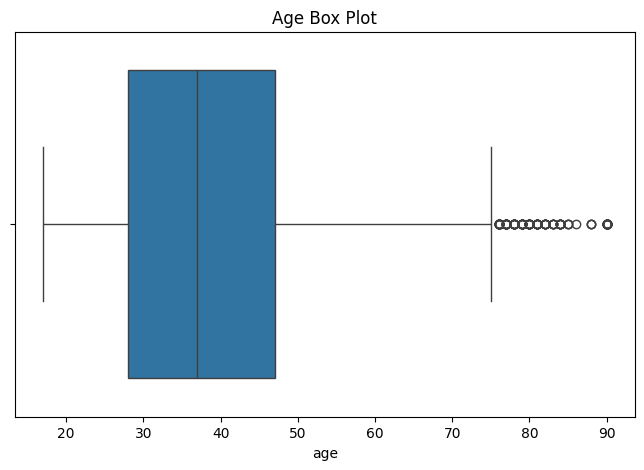

In [127]:
# Creating a box plot for the "Age" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["age"])
plt.title("Age Box Plot")
plt.show()

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_31204\2630097155.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '38.153609933575886' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adult_data.loc[adult_data["age"] > 75, "age"] = mean_age


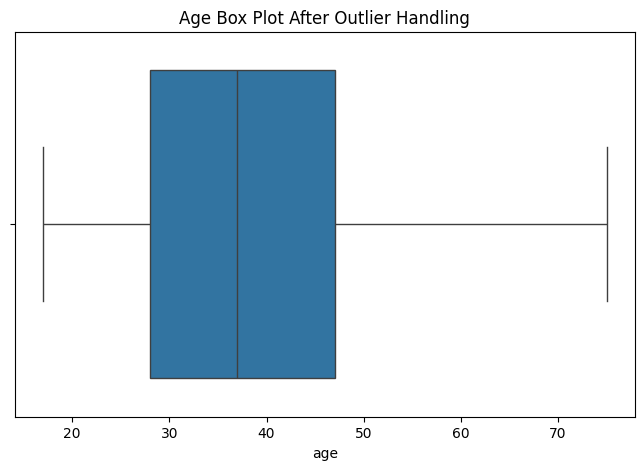

In [128]:
# Handle outliers by replacing values above 75 with the mean of values below 75
mean_age = adult_data.loc[adult_data["age"] < 75, "age"].mean()
adult_data.loc[adult_data["age"] > 75, "age"] = mean_age

# Create a box plot for the "Age" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["age"])
plt.title("Age Box Plot After Outlier Handling")
plt.show()

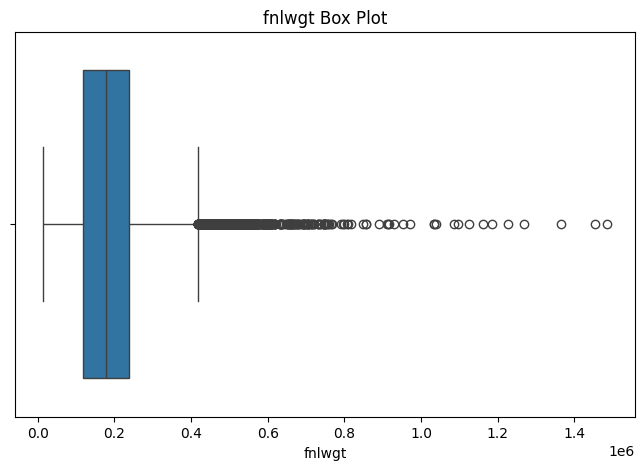

In [129]:
# Create a box plot for the "Final-Weight" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["fnlwgt"])
plt.title("fnlwgt Box Plot")
plt.show()

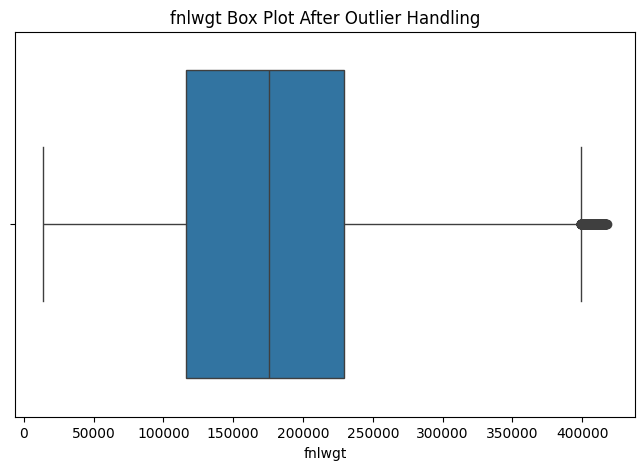

In [130]:
# Handling the outliers in Final-Weight
Q1 = adult_data['fnlwgt'].quantile(0.25)
Q3 = adult_data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
adult_data = adult_data[(adult_data['fnlwgt'] >= lower_bound) & (adult_data['fnlwgt'] <= upper_bound)]

# Create a box plot for the "fnlwgt" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["fnlwgt"])
plt.title("fnlwgt Box Plot After Outlier Handling")
plt.show()

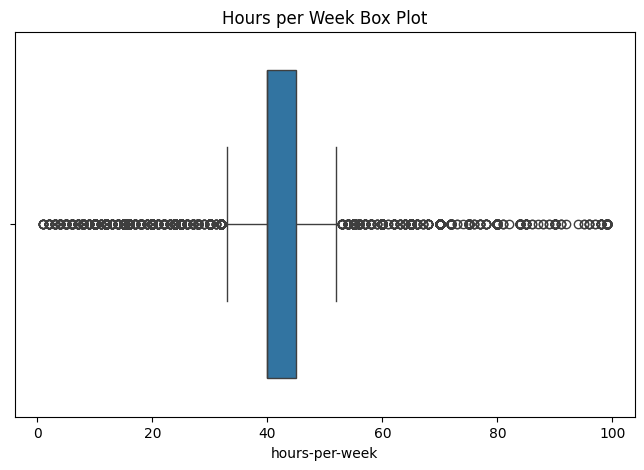

In [131]:
# Creating a box plot for the "Hours per Week" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["hours-per-week"])
plt.title("Hours per Week Box Plot")
plt.show()

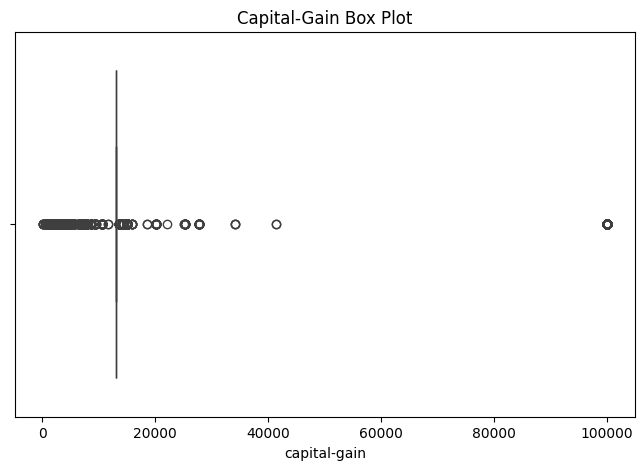

In [132]:
# Create a box plot for the "capital-gain" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["capital-gain"])
plt.title("Capital-Gain Box Plot")
plt.show()

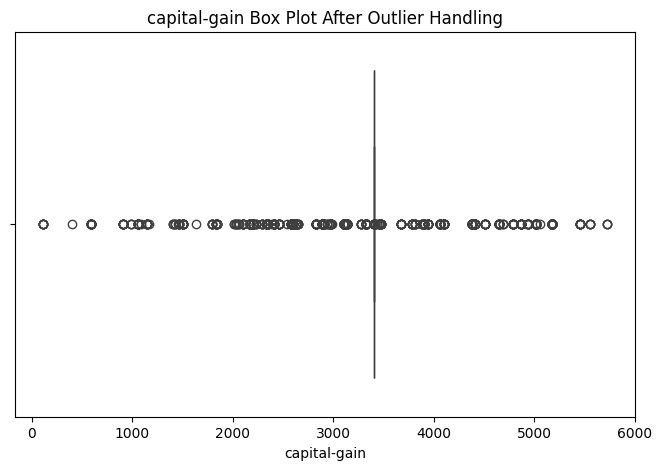

In [133]:
# Handle outliers by replacing values above 6000 with the mean of values below that threshold
outlier_threshold = 6000

mean_below_threshold = adult_data.loc[adult_data["capital-gain"] <= outlier_threshold, "capital-gain"].mean()
adult_data.loc[adult_data["capital-gain"] > outlier_threshold, "capital-gain"] = mean_below_threshold

# Create a box plot for the "capital-gain" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["capital-gain"])
plt.title("capital-gain Box Plot After Outlier Handling")
plt.show()

In [134]:
adult_data.head()

age          workclass  fnlwgt   education  education-num  \
0  39.0          State-gov   77516   Bachelors             13   
1  50.0   Self-emp-not-inc   83311   Bachelors             13   
2  38.0            Private  215646     HS-grad              9   
3  53.0            Private  234721        11th              7   
4  28.0            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0    2174.00000   1867.898388              40   United-States   <=50K  
1    3403.72118   1867.898388              13   United-States   <=50K  
2    3403.72118   1867.898388              40   United-States   <=50K  
3    3403.72118   1867.898388              40   United-States   <=50K  
4    3403.72118   1867.898388              40            Cuba   <=50K

In [135]:
# Creating new column of income_num in dataframe. It is valued according to income.(Income : >50k = 1, <=50k = 0)
adult_data['income_num'] = adult_data['income'].map({' <=50K':0, ' >50K':1})
adult_data.head()

age          workclass  fnlwgt   education  education-num  \
0  39.0          State-gov   77516   Bachelors             13   
1  50.0   Self-emp-not-inc   83311   Bachelors             13   
2  38.0            Private  215646     HS-grad              9   
3  53.0            Private  234721        11th              7   
4  28.0            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  \
0    2174.00000   1867.898388              40   United-States   <=50K   
1    3403.72118   1867.898388              13   United-States   <=50K   
2    3403.72118   1867.898388              40   United-States   <=50K   
3    3403.72118   1867.898388              40   United-States   <=50K   
4    3403.72118   1867.898388              40            Cuba   <=50K   

   income_num  
0           0  
1           0  
2           0  
3           0  
4           0

In [136]:
# Finding the count of rows which has below_50k income and above_50k income.

below_50k=(adult_data.income_num == 0).sum()
print("Income with below 50k count :",below_50k)
above_50k=(adult_data.income_num == 1).sum()
print("Income with above 50k count :",above_50k)

Income with below 50k count : 21953
Income with above 50k count : 7306


### DATA VISUALIZATION

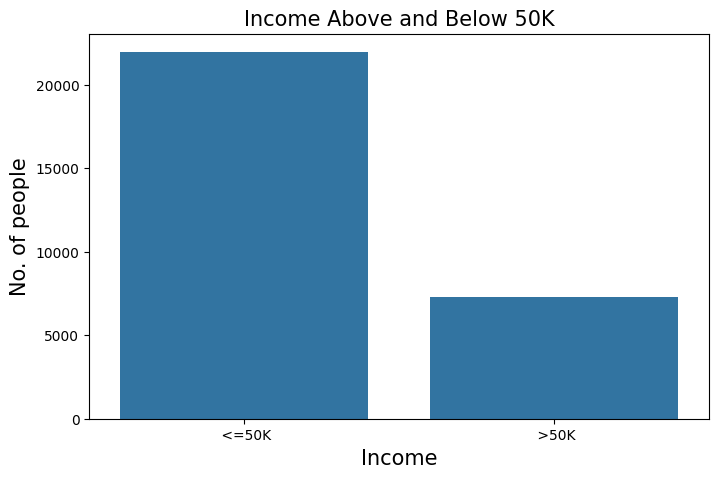

In [137]:
# Plotting bar chart income vs no. of people
fig,axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data = adult_data, x='income')
plt.title('Income Above and Below 50K',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('No. of people',fontsize=15)
plt.show()

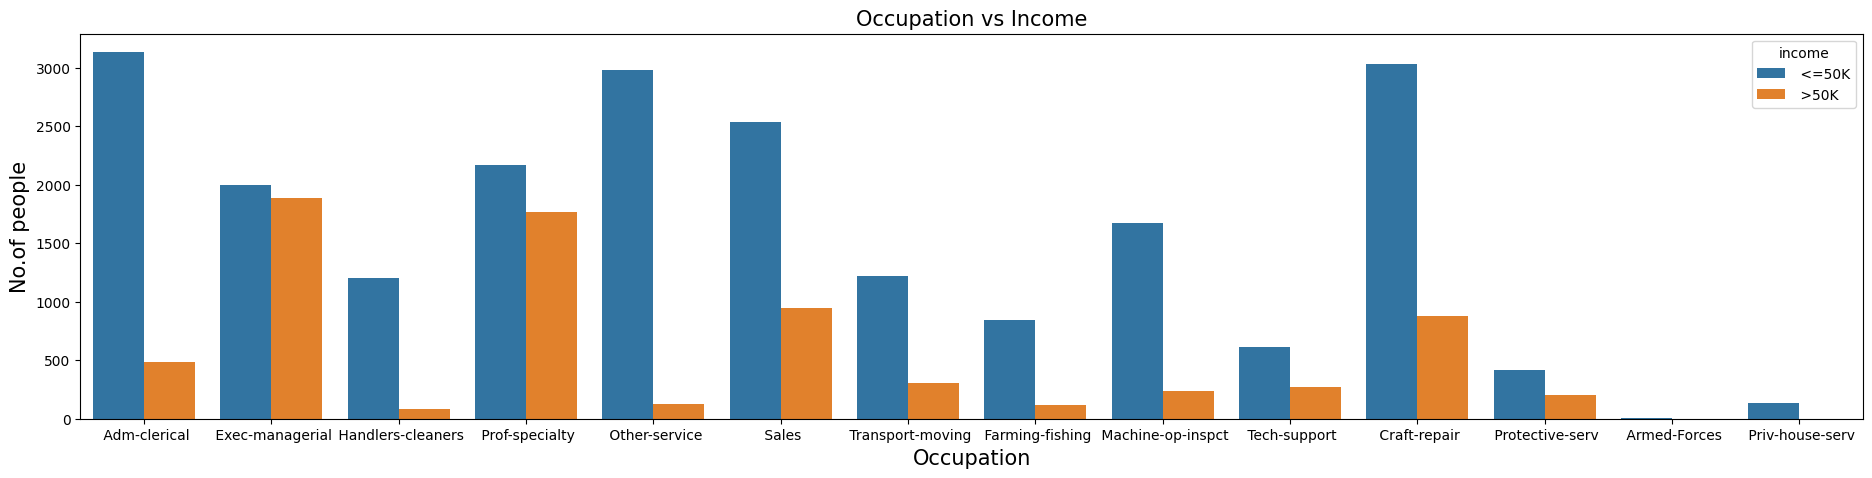

In [138]:
# Plotting the bar chart of occupation vs income count.
fig, axes = plt.subplots(1,1,figsize=(23,5))
sns.countplot(data=adult_data,x='occupation',hue='income')
plt.title('Occupation vs Income',fontsize=15)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

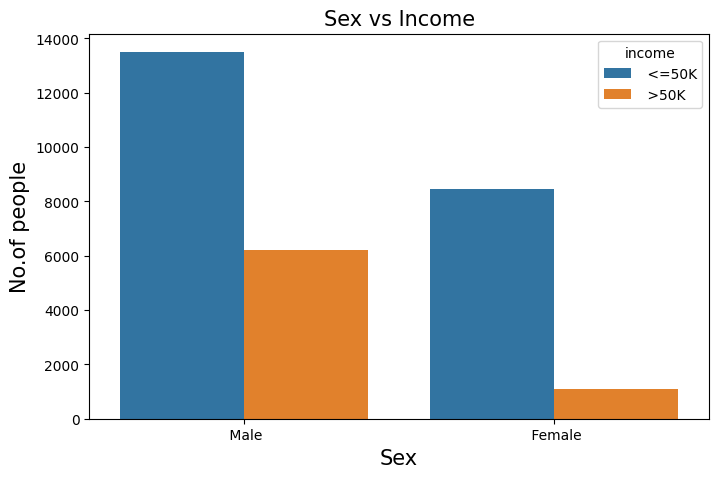

In [139]:
# Plotting the bar charts of sex vs income count.
fig, axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data=adult_data,x='sex',hue='income')
plt.title('Sex vs Income',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

#### BIVARIATE ANALYSIS

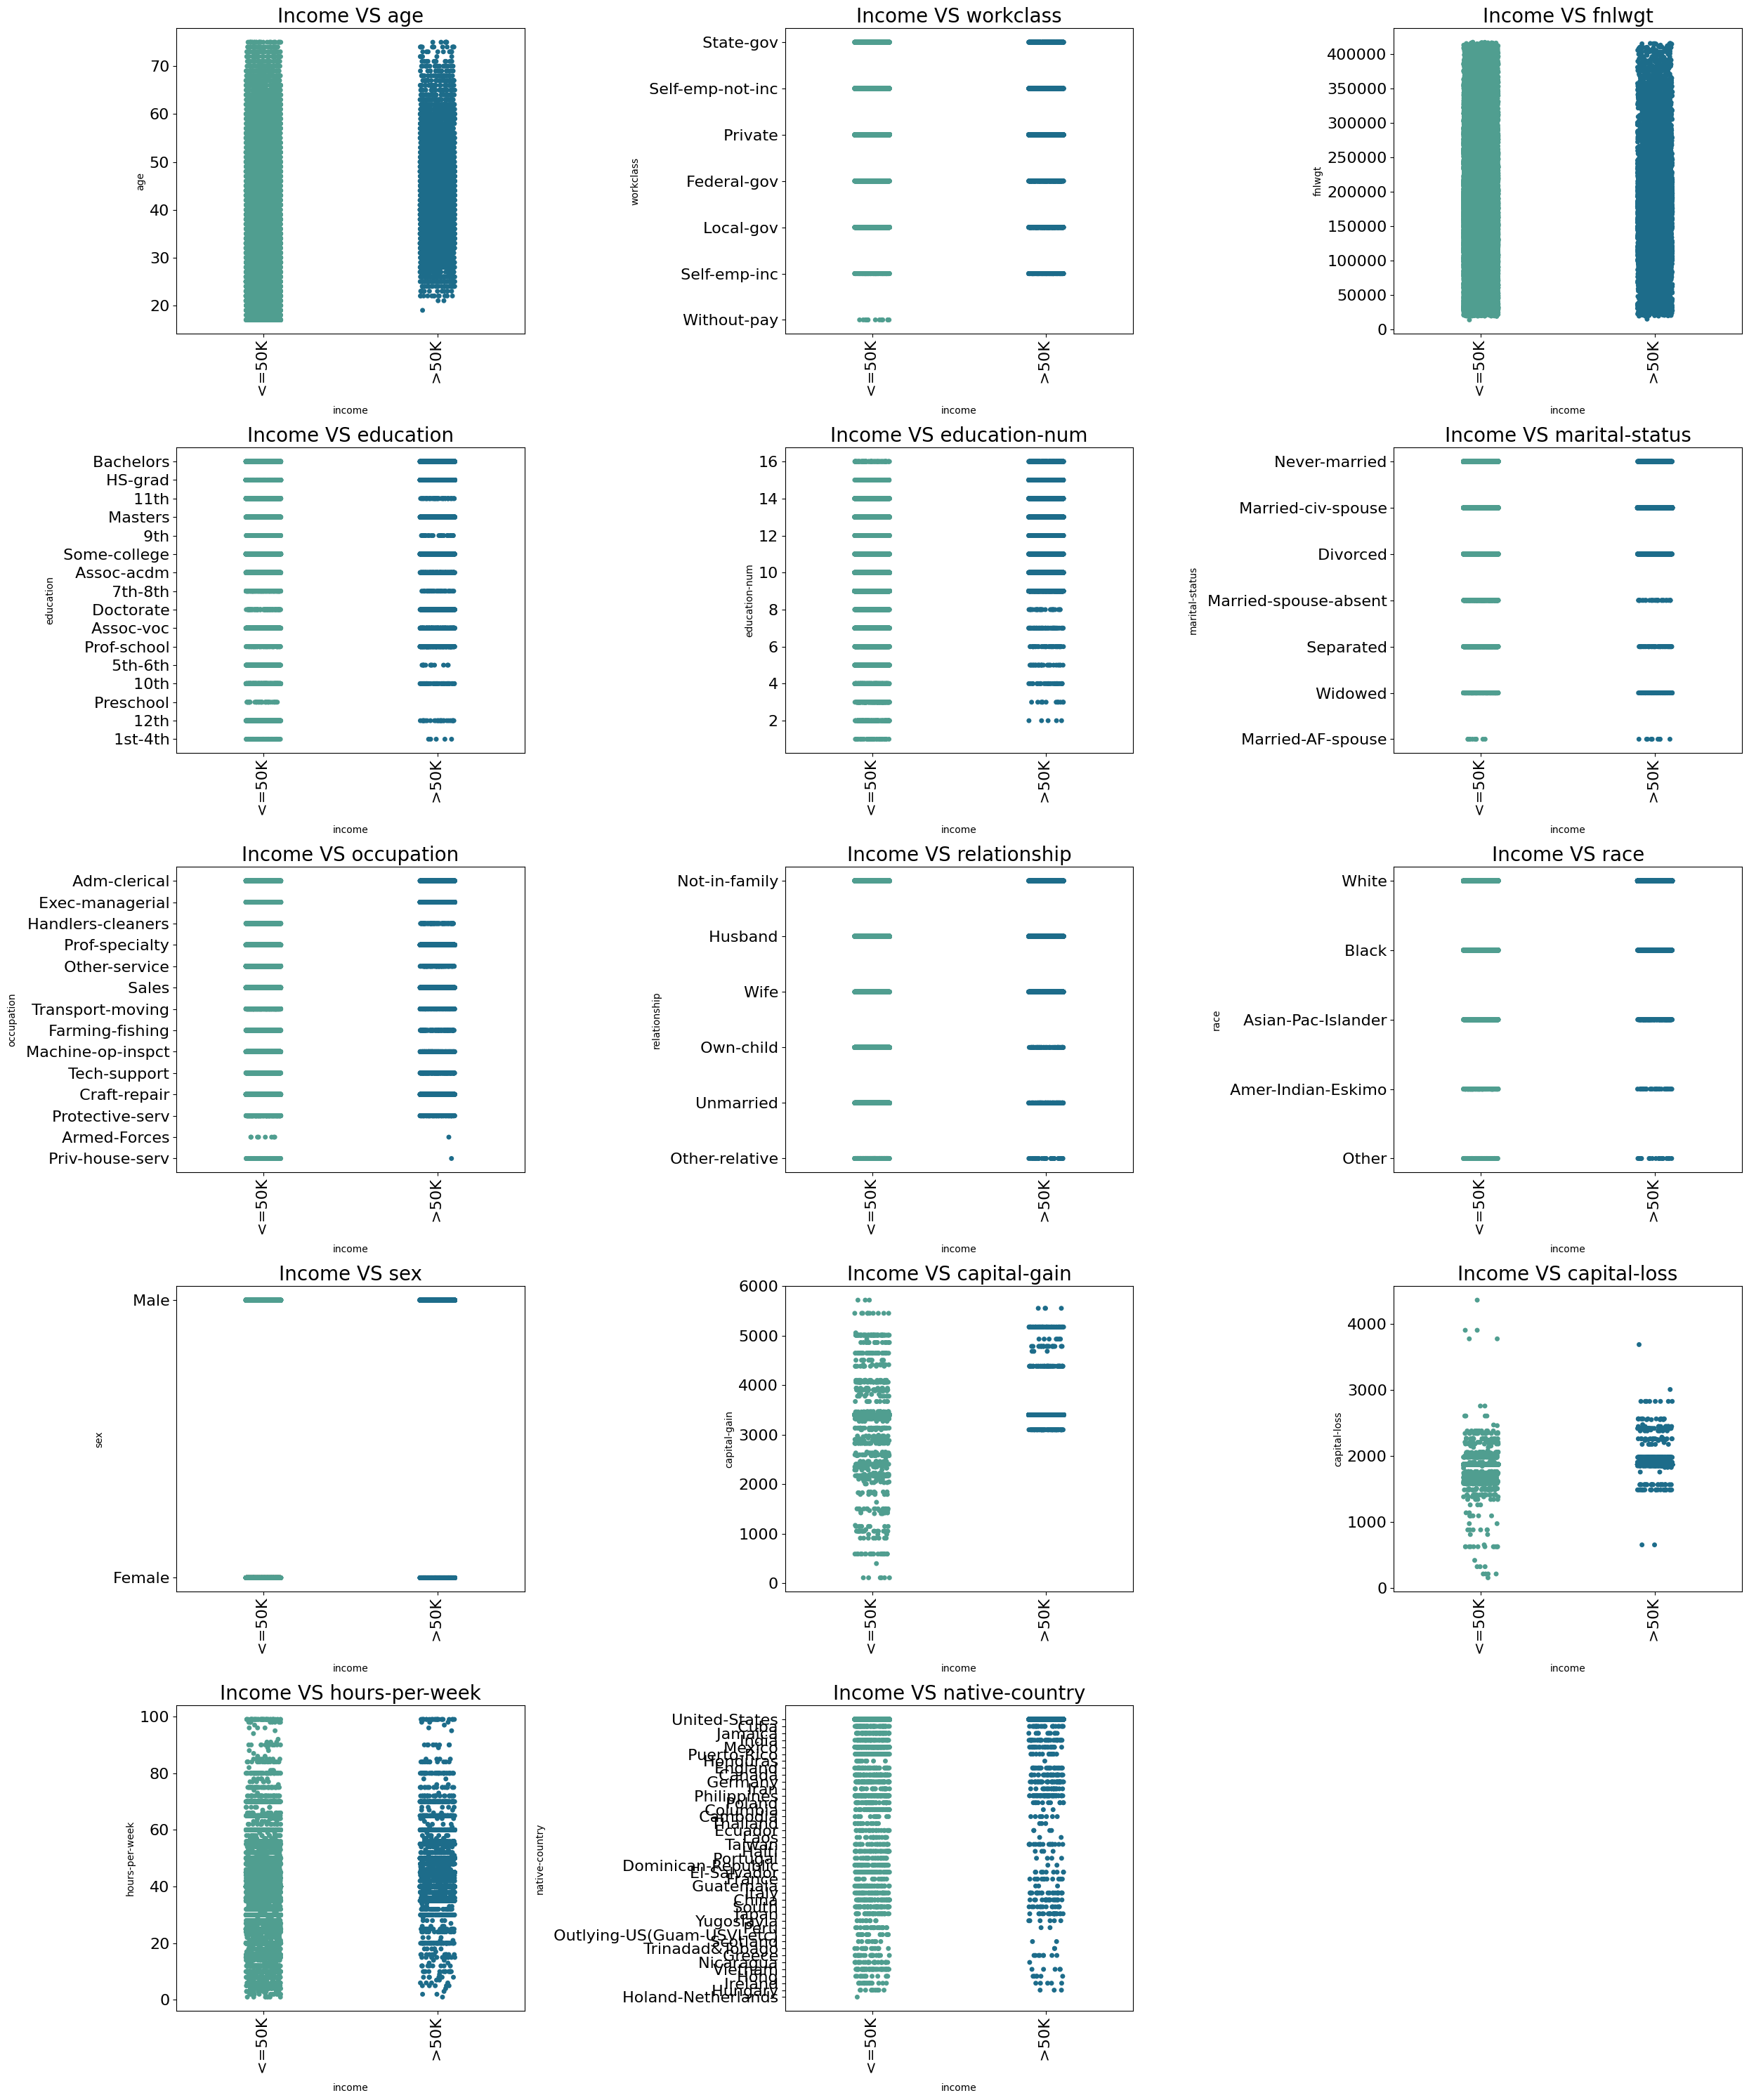

In [140]:
# Bivariate Analysis of Income Vs All features
col1 = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

palette = {" <=50K": "blue", " >50K": "green"}

plt.figure(figsize=(25,30))
for i in range(len(col1)):
    plt.subplot(5,3,i+1)
    sns.stripplot(x = adult_data['income'], y = adult_data[col1[i]], palette='crest', hue = adult_data['income'])
    plt.title(f"Income VS {col1[i]}", fontsize = 20)
    plt.xticks(rotation = 90, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.tight_layout()

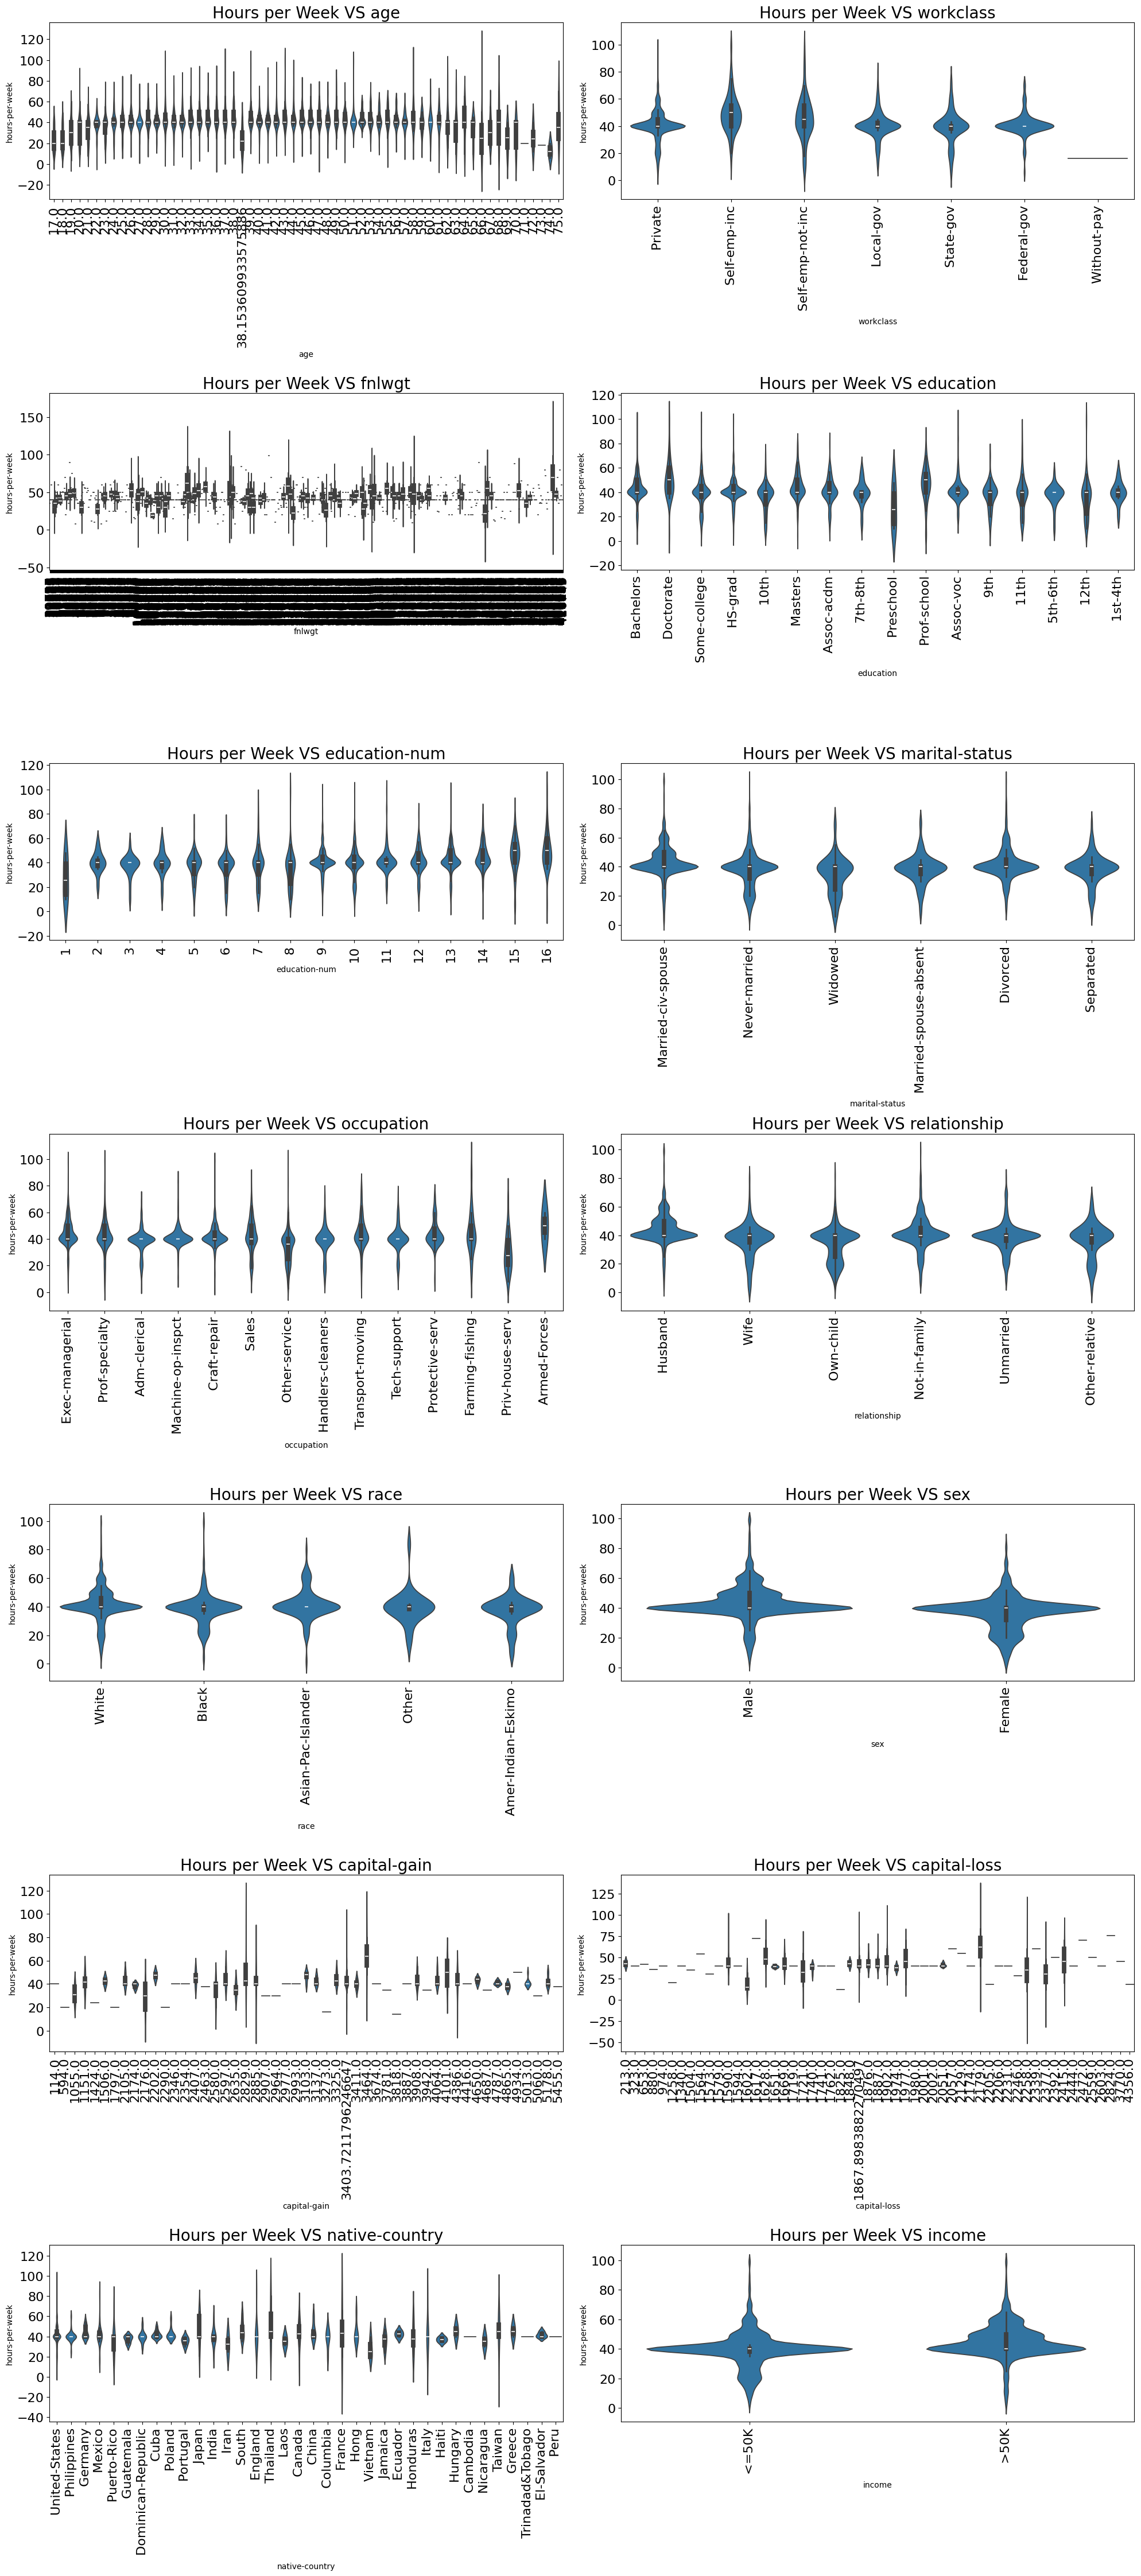

In [141]:
# Bivariate Analysis of Hours per Work Vs All features
if len(adult_data) > 10000:  # Assuming if dataset has more than 10,000 rows, sample
    adult_data_sample = adult_data.sample(frac=0.1, random_state=1)

col2 = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
        'capital-gain', 'capital-loss', 'native-country', 'income']

palette = {" <=50K": "blue", " >50K": "green"}

plt.figure(figsize=(20, 45)) 
for i in range(len(col2)):
    plt.subplot(7, 2, i+1)
    sns.violinplot(y=adult_data_sample['hours-per-week'], x=adult_data_sample[col2[i]])
    plt.title(f"Hours per Week VS {col2[i]}", fontsize=20)
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)

plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Income VS Work of Hours')

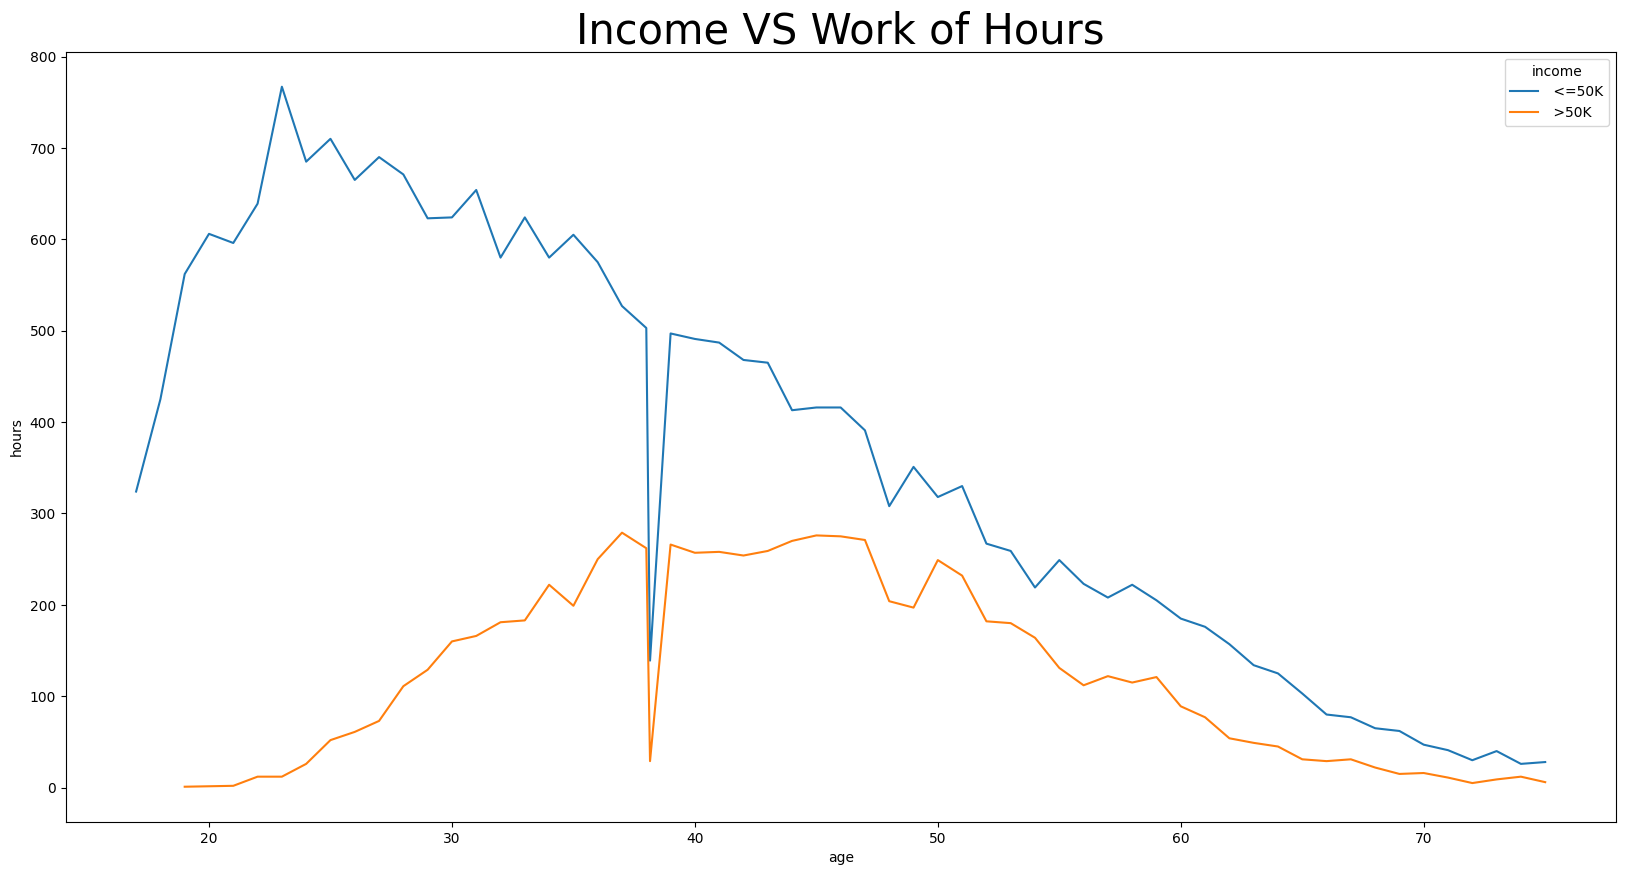

In [142]:
# Income VS Work of Hours
adult_data0 = adult_data.groupby(['age', 'income']).apply(lambda x:x['hours-per-week'].count()).reset_index(name="hours")

plt.figure(figsize=(20,10))
sns.lineplot(x='age', y='hours', data=adult_data0, hue='income')
plt.title("Income VS Work of Hours", fontsize=30)

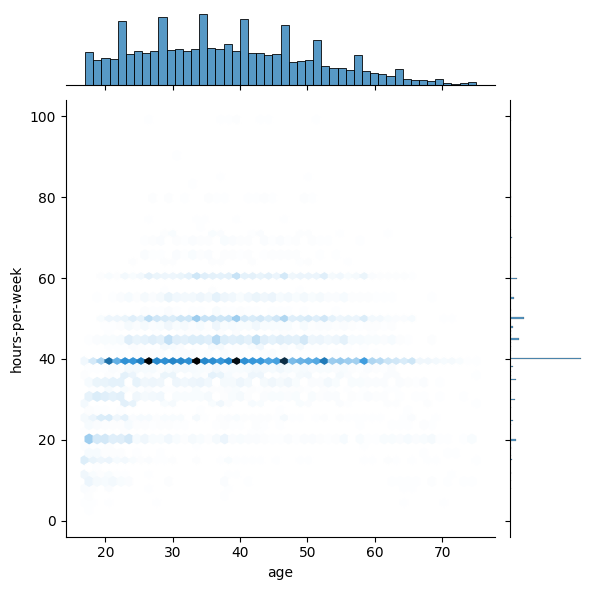

In [143]:
sns.jointplot(x ="age", y="hours-per-week", data=adult_data, kind="hex")

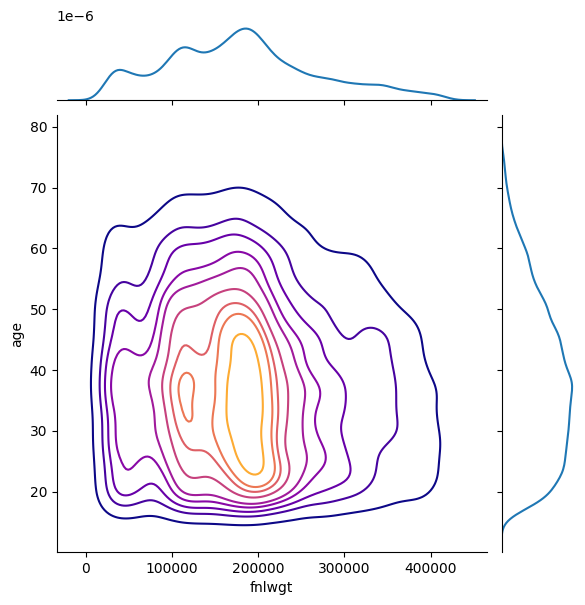

In [144]:
sns.jointplot(x="fnlwgt", y="age", data=adult_data, kind="kde", cmap="plasma", thresh=0.05)

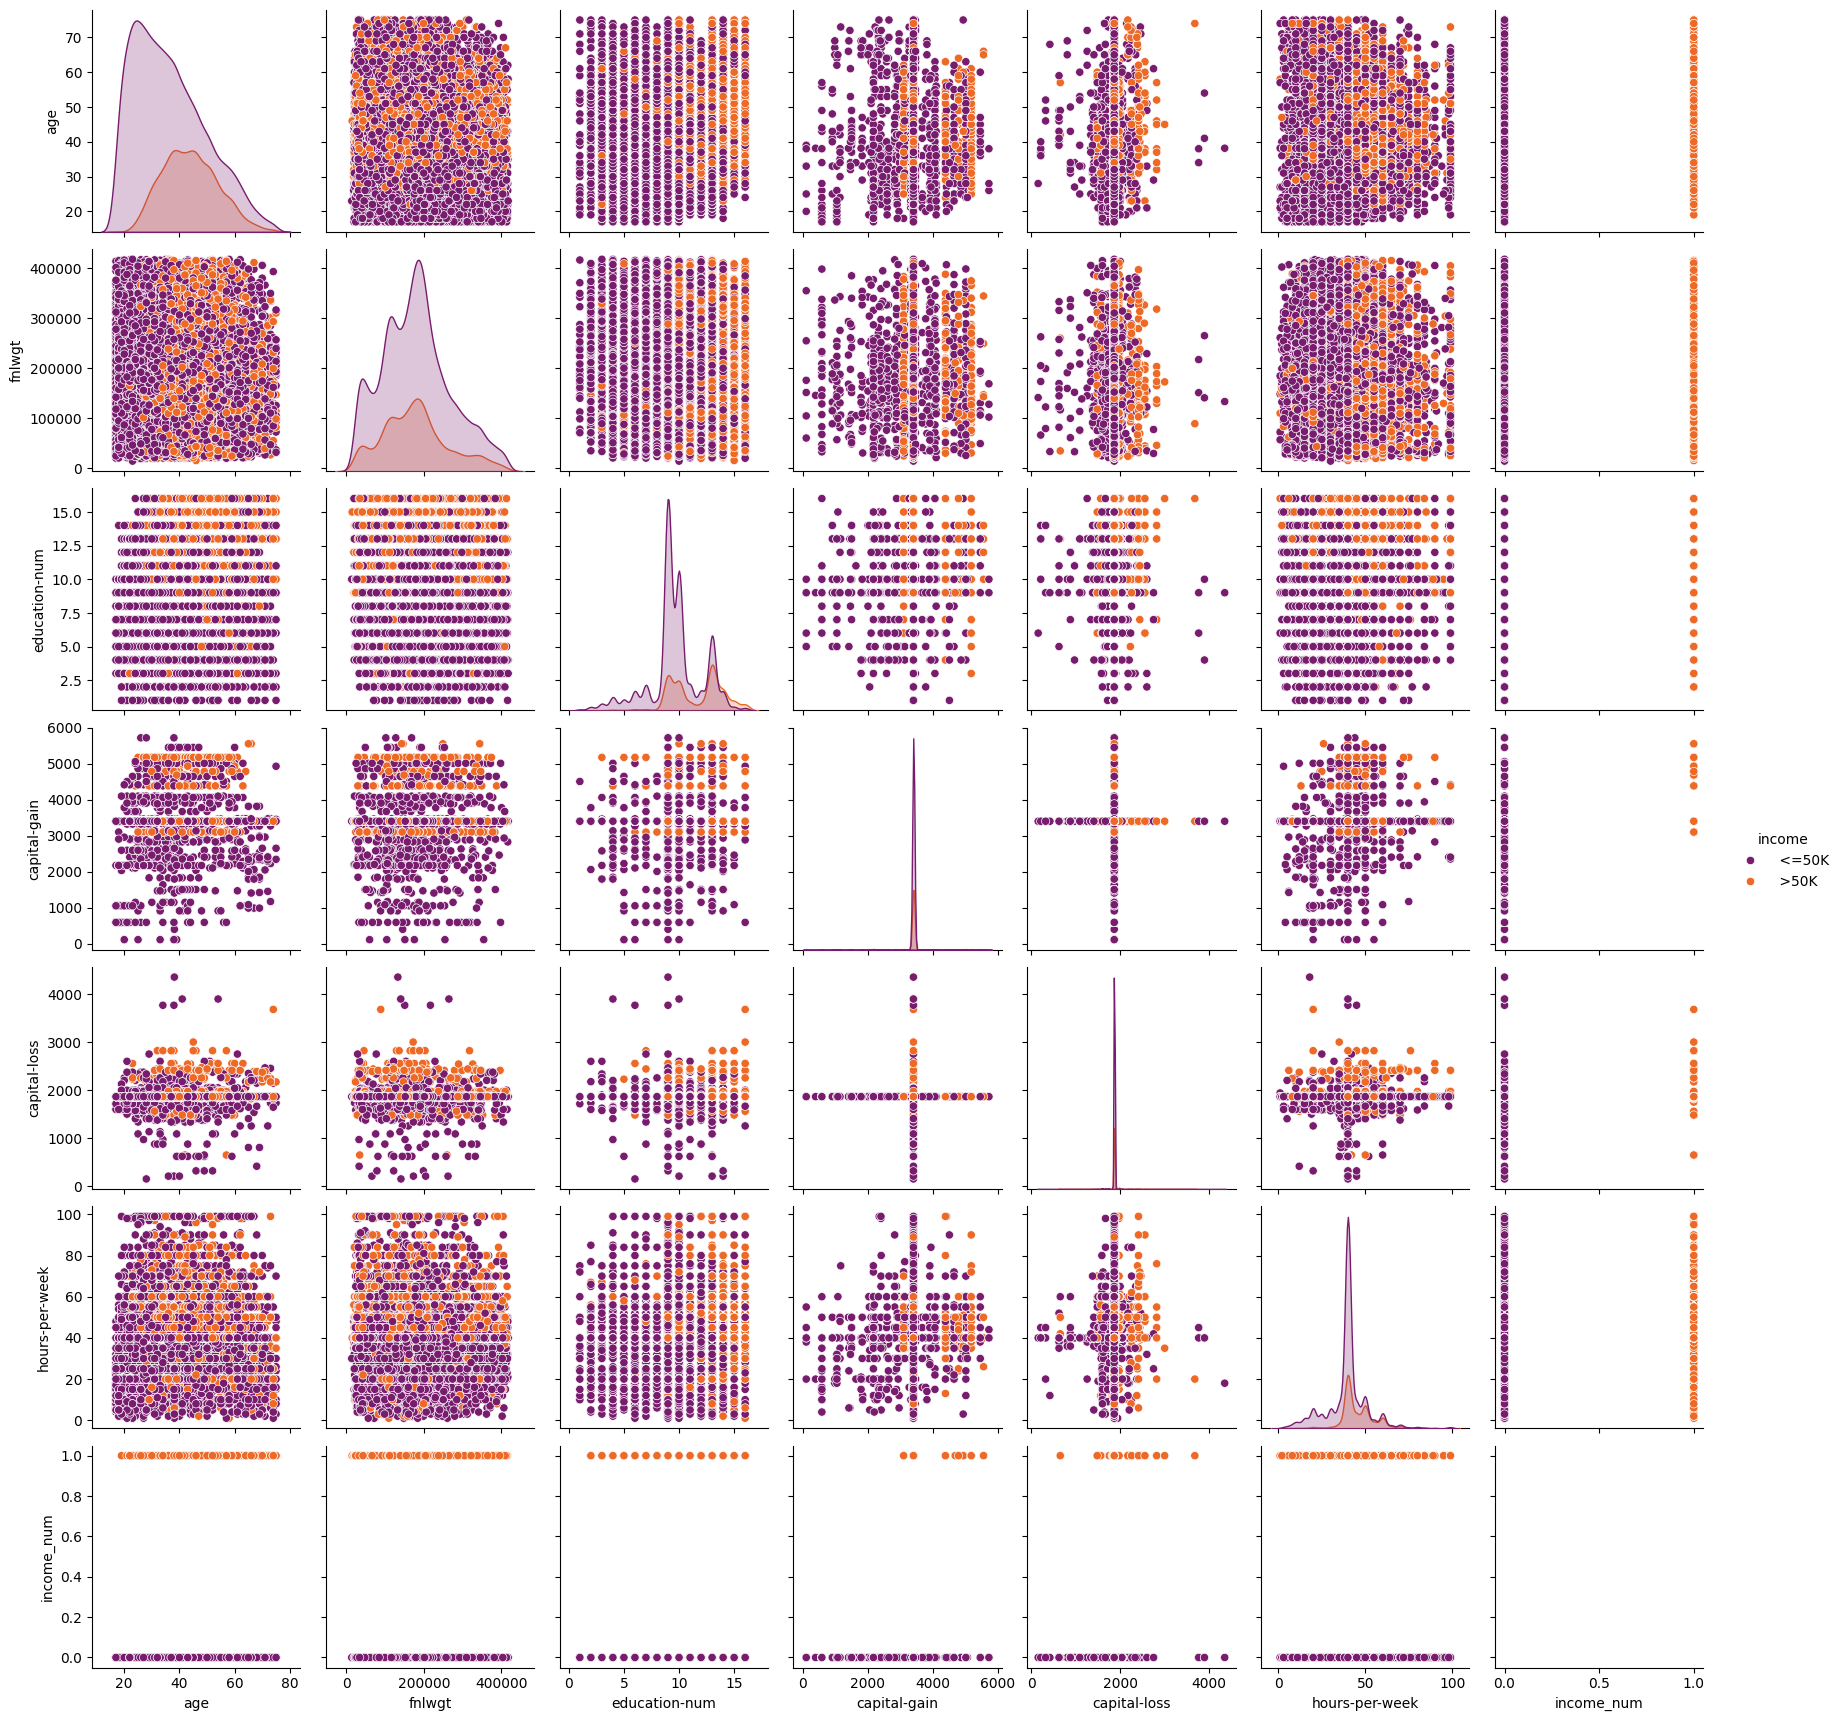

In [145]:
sns.pairplot(adult_data, hue = 'income', palette = 'inferno')

In [146]:
# Saving the DataFrame to a CSV File
adult_data.to_csv('preprocessed_dataset/preprocessed_adult_data.csv', index=False)